In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os

In [4]:
# print(os.listdir("../Software_Defect"))
data = pd.read_csv('cm1.csv')

In [5]:
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [6]:
defect_true_false = data.groupby('defects')['b'].apply(lambda x: x.count())
print('False: ',defect_true_false[0])
print('True: ',defect_true_false[1])

False:  449
True:  49


In [7]:
trace = go.Histogram(
    x = data.defects,
    opacity = 0.75,
    name = "Defects",
    marker = dict(color = 'green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Defects',
                   xaxis = dict(title = 'True - False'),
                   yaxis = dict(title = 'Frequency'),
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

In [8]:
data.corr()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.000000,0.942908,0.773607,0.919270,0.940466,0.952699,-0.357998,0.728502,0.797565,0.814611,...,0.679721,0.862704,0.679942,-0.040300,0.803036,0.943241,0.941778,0.929347,0.940823,0.246467
v(g),0.942908,1.000000,0.806544,0.929741,0.907581,0.919714,-0.342571,0.773446,0.668793,0.856458,...,0.733292,0.795747,0.666712,-0.029726,0.801255,0.860150,0.910242,0.894691,0.991826,0.166761
ev(g),0.773607,0.806544,1.000000,0.714994,0.770008,0.773645,-0.280011,0.675765,0.554699,0.685490,...,0.605862,0.682972,0.568783,-0.020170,0.649567,0.710749,0.775750,0.753672,0.829226,0.105047
iv(g),0.919270,0.929741,0.714994,1.000000,0.870063,0.889894,-0.300078,0.679901,0.696397,0.826191,...,0.674501,0.739883,0.647548,-0.024960,0.755188,0.857157,0.873645,0.856111,0.911202,0.202645
n,0.940466,0.907581,0.770008,0.870063,1.000000,0.993306,-0.397294,0.841433,0.810141,0.844168,...,0.727183,0.794619,0.731518,-0.038936,0.837047,0.947383,0.997563,0.994124,0.912958,0.214049
v,0.952699,0.919714,0.773645,0.889894,0.993306,1.000000,-0.346625,0.797672,0.792191,0.876855,...,0.731986,0.813944,0.721394,-0.032055,0.808148,0.948709,0.990824,0.987568,0.920633,0.206623
l,-0.357998,-0.342571,-0.280011,-0.300078,-0.397294,-0.346625,1.000000,-0.540916,-0.404108,-0.196933,...,-0.266412,-0.289062,-0.331775,0.398689,-0.629990,-0.402986,-0.397856,-0.392290,-0.358672,-0.132567
d,0.728502,0.773446,0.675765,0.679901,0.841433,0.797672,-0.540916,1.000000,0.514898,0.717773,...,0.614364,0.614590,0.642382,-0.057531,0.884115,0.697731,0.840947,0.834040,0.773032,0.168173
i,0.797565,0.668793,0.554699,0.696397,0.810141,0.792191,-0.404108,0.514898,1.000000,0.468739,...,0.511707,0.645486,0.580700,-0.060712,0.649853,0.914101,0.809787,0.802842,0.699037,0.267764
e,0.814611,0.856458,0.685490,0.826191,0.844168,0.876855,-0.196933,0.717773,0.468739,1.000000,...,0.664990,0.683293,0.591581,-0.015676,0.656657,0.715288,0.842162,0.839142,0.825467,0.097784


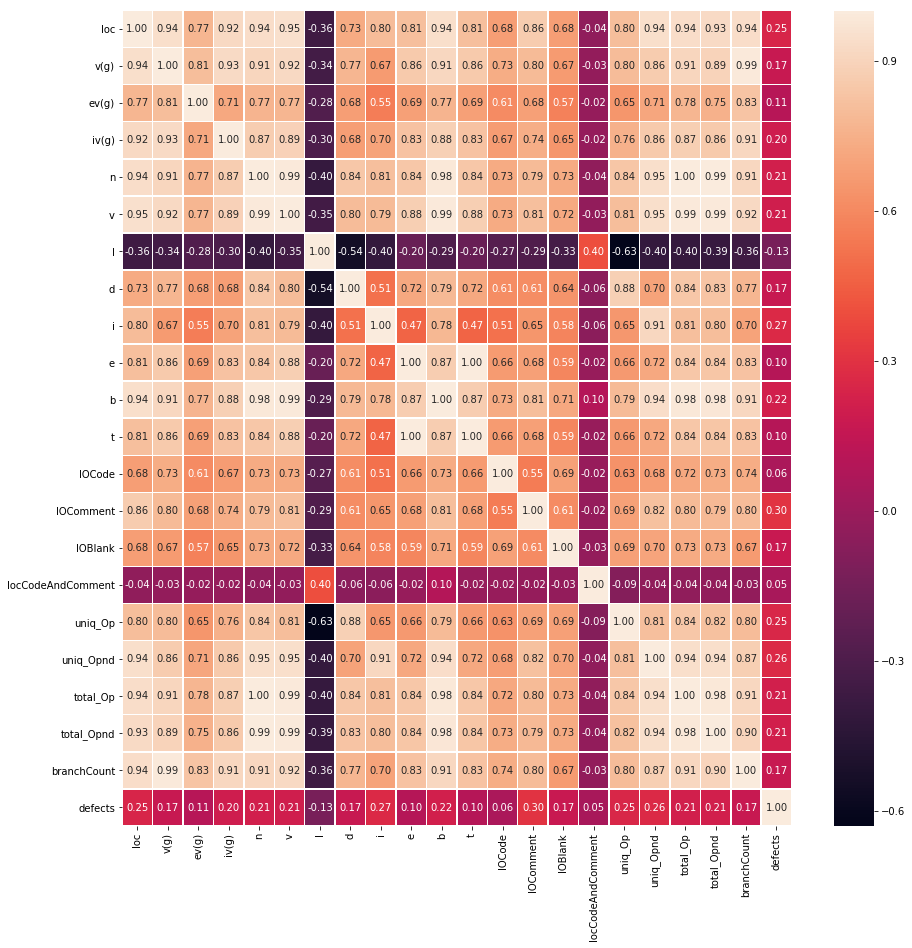

In [9]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [10]:
trace = go.Scatter(
    x = data.v,
    y = data.b,
    mode = "markers",
    name = "Volume - Bug",
    marker = dict(color = 'darkblue'),
    text = "Bug (b)")

scatter_data = [trace]
scatter_layout = dict(title = 'Volume - Bug',
              xaxis = dict(title = 'Volume', ticklen = 5),
              yaxis = dict(title = 'Bug' , ticklen = 5),
             )
fig = dict(data = scatter_data, layout = scatter_layout)
iplot(fig)

In [11]:
data.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [12]:
trace1 = go.Box(
    x = data.uniq_Op,
    name = 'Unique Operators',
    marker = dict(color = 'blue')
    )
box_data = [trace1]
iplot(box_data)

In [13]:
def evaluation_control(data):    
    evaluation = (data.n < 300) & (data.v < 1000 ) & (data.d < 50) & (data.e < 500000) & (data.t < 5000)
    data['complexityEvaluation'] = pd.DataFrame(evaluation)
    data['complexityEvaluation'] = ['Succesful' if evaluation == True else 'Redesign' for evaluation in data.complexityEvaluation]

In [14]:
evaluation_control(data)
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,Succesful
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1.0,1.0,1.0,1.0,1.0,True,Succesful
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,0,6,0,15.0,15.0,44.0,19.0,9.0,False,Succesful
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,3,0,16.0,8.0,31.0,16.0,7.0,False,Succesful
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,3,0,16.0,12.0,46.0,26.0,11.0,False,Succesful
5,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,3,0,16.0,12.0,46.0,26.0,11.0,False,Succesful
6,7.0,1.0,1.0,1.0,11.0,34.87,0.50,2.00,17.43,69.74,...,0,1,0,4.0,5.0,6.0,5.0,1.0,False,Succesful
7,12.0,2.0,1.0,2.0,23.0,94.01,0.16,6.43,14.62,604.36,...,0,7,0,10.0,7.0,14.0,9.0,3.0,False,Succesful
8,25.0,5.0,5.0,5.0,107.0,548.83,0.07,14.25,38.51,7820.87,...,16,13,0,15.0,20.0,69.0,38.0,9.0,False,Succesful
9,46.0,15.0,3.0,1.0,239.0,1362.41,0.04,22.30,61.10,30377.95,...,35,22,0,15.0,37.0,129.0,110.0,29.0,False,Redesign


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 23 columns):
loc                     498 non-null float64
v(g)                    498 non-null float64
ev(g)                   498 non-null float64
iv(g)                   498 non-null float64
n                       498 non-null float64
v                       498 non-null float64
l                       498 non-null float64
d                       498 non-null float64
i                       498 non-null float64
e                       498 non-null float64
b                       498 non-null float64
t                       498 non-null float64
lOCode                  498 non-null int64
lOComment               498 non-null int64
lOBlank                 498 non-null int64
locCodeAndComment       498 non-null int64
uniq_Op                 498 non-null float64
uniq_Opnd               498 non-null float64
total_Op                498 non-null float64
total_Opnd              498 non-null float64
bra

In [16]:
data.groupby("complexityEvaluation").size()

complexityEvaluation
Redesign     112
Succesful    386
dtype: int64

In [17]:
# Histogram
trace = go.Histogram(
    x = data.complexityEvaluation,
    opacity = 0.75,
    name = 'Complexity Evaluation',
    marker = dict(color = 'darkorange')
)
hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Complexity Evaluation',
                   xaxis = dict(title = 'Succesful - Redesign'),
                   yaxis = dict(title = 'Frequency')
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

In [18]:
from sklearn import preprocessing

scale_v = data[['v']]
scale_b = data[['b']]

minmax_scaler = preprocessing.MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)

data['v_ScaledUp'] = pd.DataFrame(v_scaled)
data['b_ScaledUp'] = pd.DataFrame(b_scaled)

data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation,v_ScaledUp,b_ScaledUp
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,1.2,1.2,1.2,1.2,1.4,False,Succesful,0.000076,0.227671
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1.0,1.0,1.0,1.0,1.0,True,Succesful,0.000058,0.175131
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,0,15.0,15.0,44.0,19.0,9.0,False,Succesful,0.018052,0.017513
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,16.0,8.0,31.0,16.0,7.0,False,Succesful,0.012584,0.012259
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,16.0,12.0,46.0,26.0,11.0,False,Succesful,0.020213,0.021016
5,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,16.0,12.0,46.0,26.0,11.0,False,Succesful,0.020213,0.021016
6,7.0,1.0,1.0,1.0,11.0,34.87,0.50,2.00,17.43,69.74,...,0,4.0,5.0,6.0,5.0,1.0,False,Succesful,0.002036,0.001751
7,12.0,2.0,1.0,2.0,23.0,94.01,0.16,6.43,14.62,604.36,...,0,10.0,7.0,14.0,9.0,3.0,False,Succesful,0.005490,0.005254
8,25.0,5.0,5.0,5.0,107.0,548.83,0.07,14.25,38.51,7820.87,...,0,15.0,20.0,69.0,38.0,9.0,False,Succesful,0.032050,0.031524
9,46.0,15.0,3.0,1.0,239.0,1362.41,0.04,22.30,61.10,30377.95,...,0,15.0,37.0,129.0,110.0,29.0,False,Redesign,0.079560,0.078809


In [19]:
scaled_data = pd.concat([data.v , data.b , data.v_ScaledUp , data.b_ScaledUp], axis=1)
scaled_data

,v,b,v_ScaledUp,b_ScaledUp
0,1.30,1.30,0.000076,0.227671
1,1.00,1.00,0.000058,0.175131
2,309.13,0.10,0.018052,0.017513
3,215.49,0.07,0.012584,0.012259
4,346.13,0.12,0.020213,0.021016
5,346.13,0.12,0.020213,0.021016
6,34.87,0.01,0.002036,0.001751
7,94.01,0.03,0.005490,0.005254
8,548.83,0.18,0.032050,0.031524
9,1362.41,0.45,0.079560,0.078809


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 25 columns):
loc                     498 non-null float64
v(g)                    498 non-null float64
ev(g)                   498 non-null float64
iv(g)                   498 non-null float64
n                       498 non-null float64
v                       498 non-null float64
l                       498 non-null float64
d                       498 non-null float64
i                       498 non-null float64
e                       498 non-null float64
b                       498 non-null float64
t                       498 non-null float64
lOCode                  498 non-null int64
lOComment               498 non-null int64
lOBlank                 498 non-null int64
locCodeAndComment       498 non-null int64
uniq_Op                 498 non-null float64
uniq_Opnd               498 non-null float64
total_Op                498 non-null float64
total_Opnd              498 non-null float64
bra

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection

X = data.iloc[:, :-10].values  #Select related attribute values for selection
Y = data.complexityEvaluation.values   #Select classification attribute values

In [22]:
Y

array(['Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Redesign',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Redesign',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Redesign', 'Redesign',
       'Succesful', 'Redesign', 'Redesign', 'Redesign', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Redesign', 'Redesign',
       'Redesign', 'Succesful', 'Succesful', 'Succesful', 'Redesign',
       'Redesign', 'Succesful', 'Redesign', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Redesign',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Redesign', 'Succesful', 'Succesful',
       

In [23]:
#Parsing selection and verification datasets
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [24]:
from sklearn import tree

In [25]:
model = tree.DecisionTreeClassifier()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Decision Tree Algorithm
             precision    recall  f1-score   support

   Redesign       1.00      1.00      1.00        21
  Succesful       1.00      1.00      1.00        79

avg / total       1.00      1.00      1.00       100

[[21  0]
 [ 0 79]]
ACC:  1.0


ValueError: x and y must be the same size

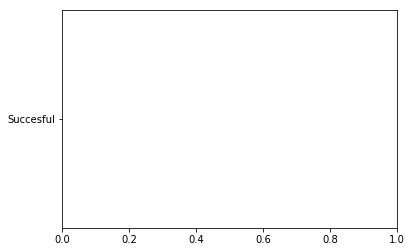

In [27]:
#The nearest line of all values in the model
plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = model.predict(X_train)
plt.plot(X_train, modelin_tahmin_ettigi_y, color = 'black')
plt.title('Line of Code - Bug', size = 15)  
plt.xlabel('Line of Code')  
plt.ylabel('Bug')  
plt.show() 